In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
import tensorflow as tf
from typing import Iterable, List
import numpy as np
import math
from SpatialPooler import SpatialPooler
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

(60000, 28, 28)

<IPython.core.display.Javascript object>

In [5]:
sample_size = 2000
x_train, y_train = x_train[:sample_size], y_train[:sample_size]

<IPython.core.display.Javascript object>

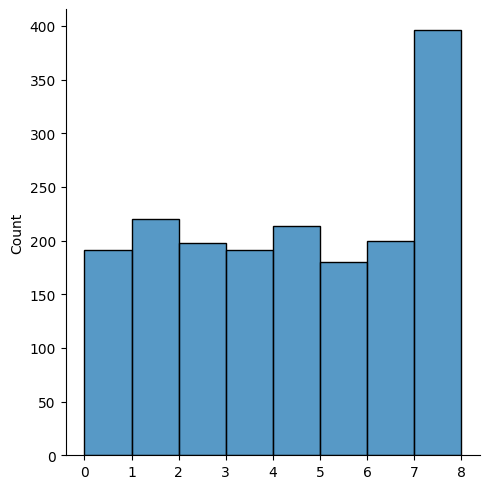

<IPython.core.display.Javascript object>

In [6]:
sns.displot(y_train, bins=(range(0, 9)))

In [7]:
inp_shape = x_train[0].shape
inp_shape

(28, 28)

<IPython.core.display.Javascript object>

<AxesSubplot:>

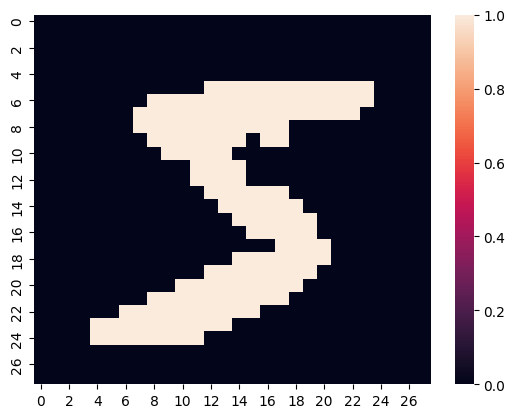

<IPython.core.display.Javascript object>

In [8]:
sample = x_train[0].astype("int32")
sample[sample > 0] = 1
sns.heatmap(sample)

In [78]:
COLUMN_SPARSITY = 0.2
COLUMN_DIM = (32, 32)

<IPython.core.display.Javascript object>

In [42]:
sp = SpatialPooler(
    input_dimension=inp_shape,
    column_dimension=COLUMN_DIM,
    connection_sparsity=0.2,
    permanence_threshold=0.5,
    stimulus_threshold=30.0,
    permanence_increment=0.2,
    permanence_decrement=0.1,
    column_sparsity=COLUMN_SPARSITY,
)

<IPython.core.display.Javascript object>

In [43]:
for sample in tqdm(x_train):
    sample = sample.astype("int32")
    sample[sample > 0] = 1

    sp.compute(sample, learn=True)
sp.save_state("sp_state")

  0%|          | 0/2000 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [67]:
def get_sdrs(samples: np.ndarray) -> np.ndarray:
    sdrs = np.zeros((samples.shape[0], 1024))
    for idx, sample in enumerate(samples):
        sample = sample.astype("int32")
        sample[sample > 0] = 1
        active_columns = sp.compute(sample, learn=False)
        sdr = sp.top_columns_to_sdr(active_columns)
        sdrs[idx] = sdr

    return sdrs

<IPython.core.display.Javascript object>

In [80]:
from util import get_mean_similiraty, similiraty_to_percent, get_similiraty

<IPython.core.display.Javascript object>

In [160]:
fives = np.argwhere(y_train == 5)[:25]
fives = x_train[fives]
fives = get_sdrs(fives)
ref_fives = fives[:5]
test_fives = fives[5:]

sixes = np.argwhere(y_train == 6)[:25]
sixes = x_train[sixes]
sixes = get_sdrs(sixes)
ref_sixes = sixes[:5]
test_sixes = sixes[5:]

<IPython.core.display.Javascript object>

In [161]:
sim = get_similiraty(ref_fives, test_fives[0])
mean_sim = get_mean_similiraty(ref_fives, test_fives[0])
sim_percent = similiraty_to_percent(mean_sim, COLUMN_SPARSITY, np.prod(COLUMN_DIM))

print(f"similiraty scores: {sim}")
print(f"mean similiraty: {mean_sim}")
print(f"similiraty in %: {sim_percent:.2%}")

similiraty scores: [ 18. 190. 191. 178. 191.]
mean similiraty: 153.6
similiraty in %: 75.00%


<IPython.core.display.Javascript object>

In [162]:
sim = get_similiraty(ref_sixes, test_fives[0])
mean_sim = get_mean_similiraty(ref_sixes, test_fives[0])
sim_percent = similiraty_to_percent(mean_sim, COLUMN_SPARSITY, np.prod(COLUMN_DIM))

print(f"similiraty scores: {sim}")
print(f"mean similiraty: {mean_sim}")
print(f"similiraty in %: {sim_percent:.2%}")

similiraty scores: [ 12. 189. 118.  15.  15.]
mean similiraty: 69.8
similiraty in %: 34.08%


<IPython.core.display.Javascript object>

In [163]:
sim = get_similiraty(ref_sixes, test_sixes[0])
mean_sim = get_mean_similiraty(ref_sixes, test_sixes[0])
sim_percent = similiraty_to_percent(mean_sim, COLUMN_SPARSITY, np.prod(COLUMN_DIM))

print(f"similiraty scores: {sim}")
print(f"mean similiraty: {mean_sim}")
print(f"similiraty in %: {sim_percent:.2%}")

similiraty scores: [ 77.  18.  46. 106.  94.]
mean similiraty: 68.2
similiraty in %: 33.30%


<IPython.core.display.Javascript object>

ValueError: cannot reshape array of size 1 into shape (32,32)

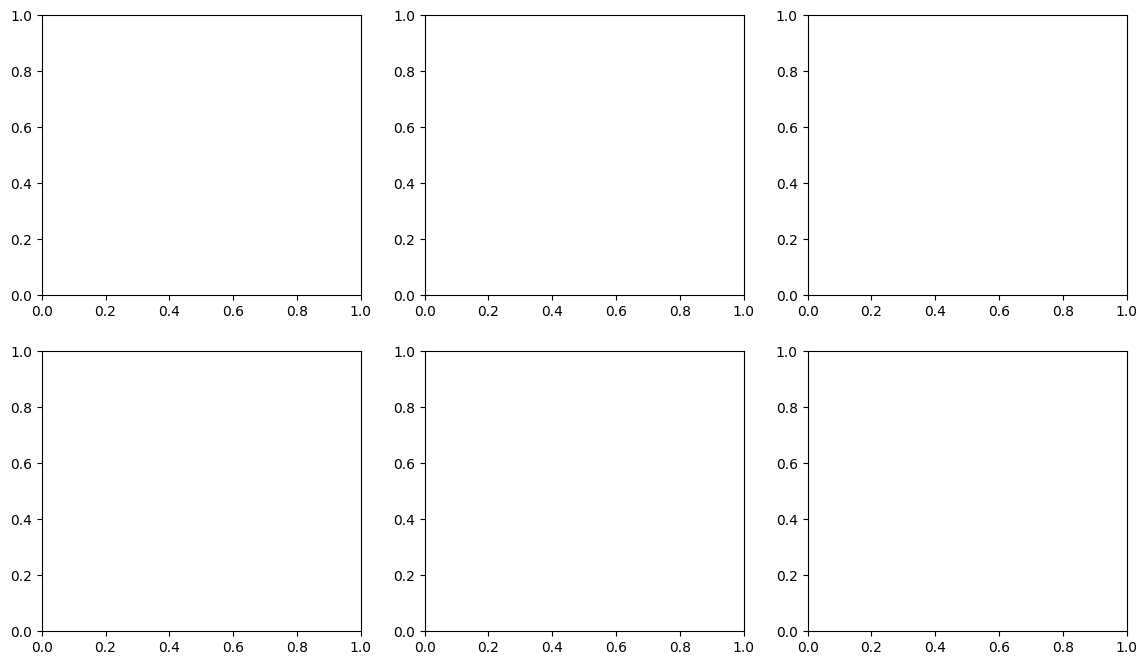

<IPython.core.display.Javascript object>

In [164]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14, 8))
fives_img = np.argwhere(y_train == 5)[:6]

for idx, sdr in enumerate(fives_img):
    sns.heatmap(
        sdr.astype("int32").reshape((32, 32)),
        ax=axes.flatten()[idx],
        square=True,
        cbar=False,
    )

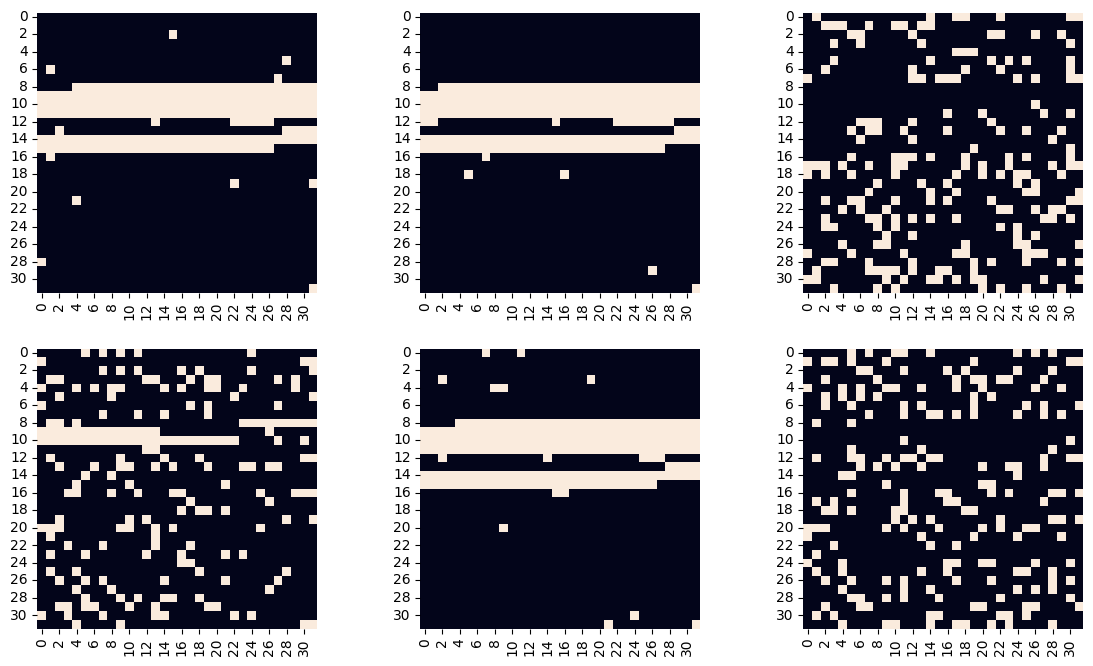

<IPython.core.display.Javascript object>

In [165]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14, 8))

for idx, sdr in enumerate(test_fives[:6]):
    sns.heatmap(
        sdr.astype("int32").reshape((32, 32)),
        ax=axes.flatten()[idx],
        square=True,
        cbar=False,
    )

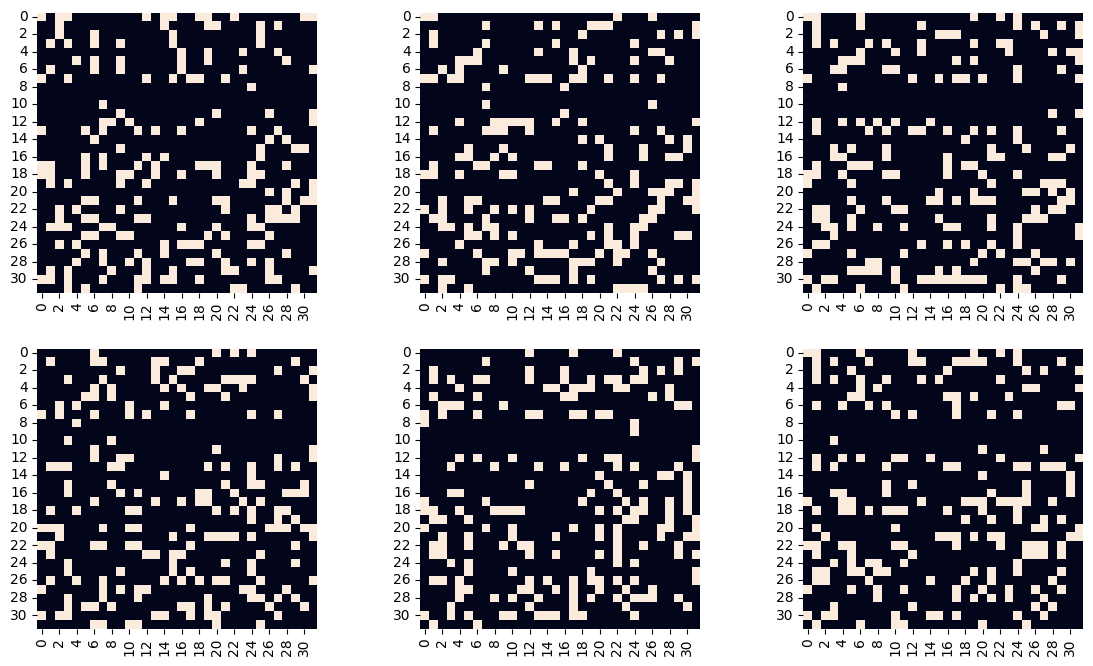

<IPython.core.display.Javascript object>

In [166]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(14, 8))

for idx, sdr in enumerate(test_sixes[:6]):
    sns.heatmap(
        sdr.astype("int32").reshape((32, 32)),
        ax=axes.flatten()[idx],
        square=True,
        cbar=False,
    )

In [ ]:
ref = f_sdrs[1]

In [ ]:
fives_overlap = get_overlaps(ref, f_sdrs)

In [ ]:
sixes_overlap = get_overlaps(ref, s_sdrs)

In [ ]:
fives_overlap

In [ ]:
np.mean(fives_overlap)

In [ ]:
sixes_overlap

In [ ]:
np.mean(sixes_overlap)

In [ ]:
sns.heatmap(sixes[0])

In [ ]:
pca_samples = x_train[:100]
pca_labels = y_train[:100]
pca_samples.shape

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(pca_sdrs, pca_labels)

neigh.score(pca_sdrs, pca_labels)

In [ ]:
knn_samples = [x.flatten() for x in list(pca_samples)]

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(knn_samples, pca_labels)
neigh.score(knn_samples, pca_labels)

In [ ]:
-> how to evaluate spatial pooler??